In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Load data & Data visualization

In [39]:
def prepare_dataset(filename):
    data = np.loadtxt(filename, delimiter=",")
    X = data[:, :-1]
    y = data[:, -1]

    X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=80)

    X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=80)

    del X_, y_
    
    return X_train, y_train, X_cv, y_cv, X_test, y_test

In [40]:
def train_plot_poly(model, X_train, y_train, X_cv, y_cv, max_degree=1, baseline=None):
    train_mses = []
    cv_mses = []
    scalers = []
    models = []
    degrees = range(1, max_degree+1)

    for degree in degrees:
        # add features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_mapped = poly.fit_transform(X_train)
        X_cv_mapped = poly.transform(X_cv)

        # scale feature
        scaler = StandardScaler()
        X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
        X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
        scalers.append(scaler)

        #train
        model.fit(X_train_mapped_scaled, y_train)
        models.append(model)

        # predict train set
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        # predict cv set
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)
    
    plt.plot(degrees, train_mses, color="green", marker="o", label="Training MSEs")
    for x, y in zip(degrees, train_mses):
        plt.text(x, y+10, f"{y:.2f}", ha="center", va="bottom", fontsize=10, color="green")
    plt.plot(degrees, cv_mses, color="blue", marker="o", label="CV MSEs")
    for x, y in zip(degrees, cv_mses):
        plt.text(x, y+10, f"{y:.2f}", fontsize=10, color="blue")
    plt.hlines(y=baseline, xmin=min(degrees), xmax=max(degrees), color="skyblue", linestyles="--", label="Baseline")
    plt.xlabel("degree")
    plt.xticks(degrees)
    plt.ylabel("MSE")
    plt.title("degree of polynominal vs train and CV MSEs")
    plt.legend(loc="best", frameon=True)
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show();

### Fixing Bias

#### Try adding polynomial features

the shape of the training set (input) is: (60, 1)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 1)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3757.57575758]
 [2878.78787879]
 [3545.45454545]
 [1575.75757576]
 [1666.66666667]]



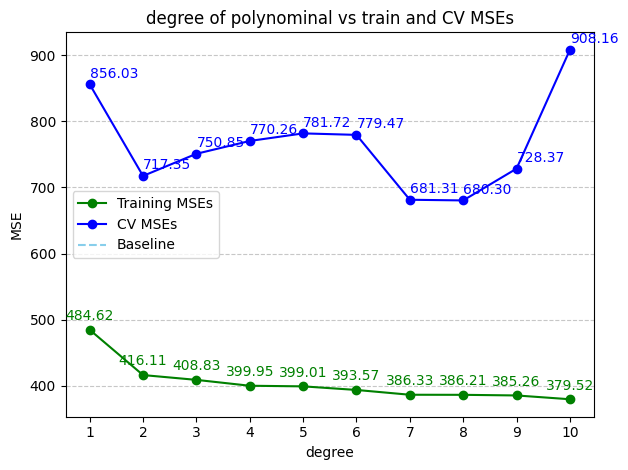

In [ ]:
X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_dataset("Data/c2w3_lab2_data1.csv")

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

print(f"first 5 rows of the training inputs (1 feature):\n {X_train[:5]}\n")

model = LinearRegression()

train_plot_poly(model, X_train, y_train, X_cv, y_cv, max_degree=10, baseline=400)

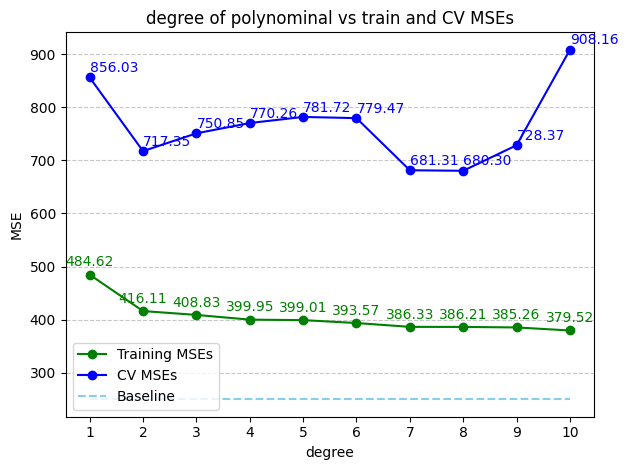

In [42]:
# Train and plot polynomial regression models. Bias is defined lower.
train_plot_poly(model, X_train, y_train, X_cv, y_cv, max_degree=10, baseline=250)

#### Try getting additional features

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]



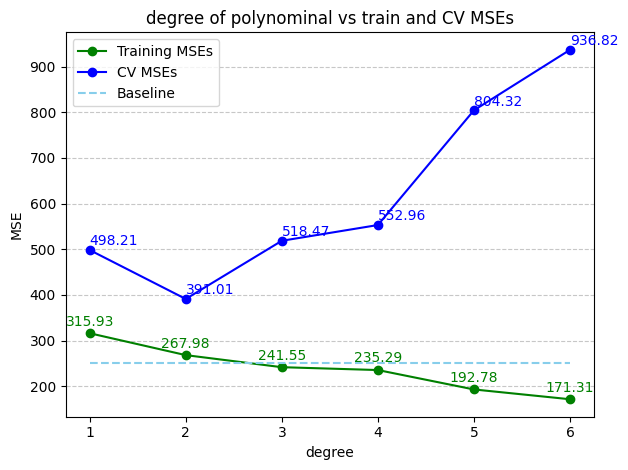

In [43]:
X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_dataset("Data/c2w3_lab2_data2.csv")

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

print(f"first 5 rows of the training inputs (1 feature):\n {X_train[:5]}\n")

model = LinearRegression()
train_plot_poly(model, X_train, y_train, X_cv, y_cv, max_degree=6, baseline=250)

#### Try descreasing the regularization parameter

In [49]:
def train_plot_reg_params(reg_params, X_train, y_train, X_cv, y_cv, degree=1, baseline=None):
    train_mses = []
    cv_mses = []
    models = []
    scalers = []

    for reg in reg_params:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_mapped = poly.fit_transform(X_train)
        X_cv_mapped = poly.transform(X_cv)

        scaler = StandardScaler()
        X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
        X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
        scalers.append(scaler)

        model = Ridge(alpha=reg)
        model.fit(X_train_mapped_scaled, y_train)
        models.append(model)

        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    reg_params = [str(reg) for reg in reg_params]
    plt.plot(reg_params, train_mses, color="green", marker="o", label="Traning MSEs")
    for x, y in zip(reg_params, train_mses):
        plt.text(x, y+10, f"{y:.2f}", ha="center", va="bottom", fontsize=10, color="green")
    for x, y in zip(reg_params, cv_mses):
        plt.text(x, y+10, f"{y:.2f}", ha="center", va="bottom", fontsize=10, color="blue")
    plt.plot(reg_params, cv_mses, color="blue", marker="o", label="CV MSEs")
    plt.plot(reg_params, np.repeat(baseline, len(reg_params)), linestyle="--", label="Baseline")
    plt.xlabel("lambda")
    plt.ylabel("MSE")
    plt.title("lambda vs train and CV MSEs")
    plt.legend(loc="best", frameon=True)
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show();

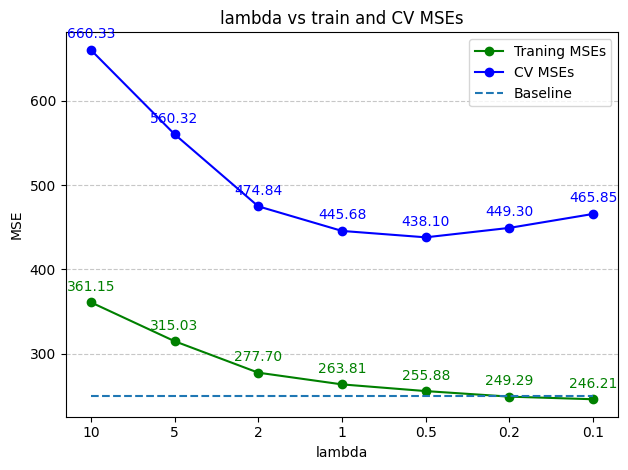

In [50]:
reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]

train_plot_reg_params(reg_params, X_train, y_train, X_cv, y_cv, degree=4, baseline=250)

### Fix High Variance

#### Try increasing the regularization parameter

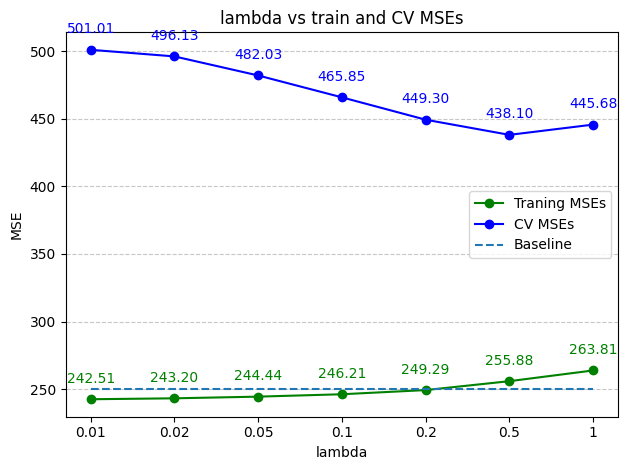

In [51]:
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

train_plot_reg_params(reg_params, X_train, y_train, X_cv, y_cv, degree= 4, baseline=250)

#### Try smaller sets of features

In [53]:
X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_dataset("Data/c2w3_lab2_data2.csv")
print(f"first 5 rows of the training set with 2 features:\n {X_train[:5]}\n")

X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_dataset("Data/c2w3_lab2_data3.csv")
print(f"first 5 rows of the training set with 3 features (1st column is a random ID):\n {X_train[:5]}\n")

first 5 rows of the training set with 2 features:
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]

first 5 rows of the training set with 3 features (1st column is a random ID):
 [[1.41929130e+07 3.75757576e+03 5.49494949e+00]
 [1.51868310e+07 2.87878788e+03 6.70707071e+00]
 [1.92662630e+07 3.54545455e+03 3.71717172e+00]
 [1.25222490e+07 1.57575758e+03 5.97979798e+00]
 [1.76537960e+07 1.66666667e+03 1.61616162e+00]]



In [59]:
def train_plot_diff_datasets(model, files, max_degree=10, baseline=None):
    for file in files:
        X_train, y_train, X_cv, y_cv, X_test, y_test = prepare_dataset(file["filename"])
        
        train_mses = []
        cv_mses = []
        models = []
        scalers = []
        degrees = range(1, max_degree+1)

        for degree in degrees:
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            X_train_mapped = poly.fit_transform(X_train)
            X_cv_mapped = poly.transform(X_cv)

            scaler = StandardScaler()
            X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
            X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
            scalers.append(scaler)

            model.fit(X_train_mapped_scaled, y_train)
            models.append(model)

            yhat = model.predict(X_train_mapped_scaled)
            train_mse = mean_squared_error(y_train, yhat) / 2
            train_mses.append(train_mse)

            yhat = model.predict(X_cv_mapped_scaled)
            cv_mse = mean_squared_error(y_cv, yhat) / 2
            cv_mses.append(cv_mse)

        plt.plot(degrees, train_mses, color="green", marker="o", linestyle=file["linestyle"], label=f"{file["label"]} training MSEs")
        plt.plot(degrees, cv_mses, color="blue", marker="o", linestyle=file["linestyle"], label=f"{file["label"]} cv MSEs")
    
    plt.hlines(y=baseline, xmin=min(degrees), xmax=max(degrees), linestyle="--", label="baseline")
    plt.xlabel("degree")
    plt.xticks(degrees)
    plt.ylabel("MSE")
    plt.legend(loc="best", frameon=True)
    plt.grid(True, axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show();


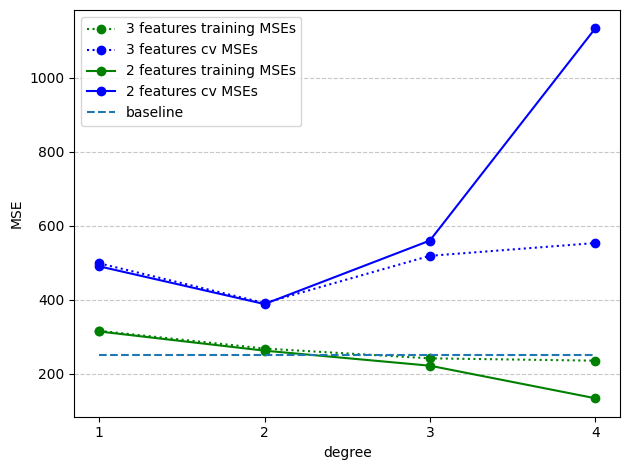

In [60]:
file1 = {
    "filename": "Data/c2w3_lab2_data2.csv",
    "label": "3 features",
    "linestyle": "dotted"
}

file2 = {
    "filename": "Data/c2w3_lab2_data3.csv",
    "label": "2 features",
    "linestyle": "solid"
}

files = [file1, file2]

model = LinearRegression()

train_plot_diff_datasets(model, files, max_degree=4, baseline=250)